<a href="https://colab.research.google.com/github/mjeannine/Spatio-Temporal-Analysis-and-Predictive-Modeling-of-Urban-Crime/blob/main/crime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Set visualization styles
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [ ]:
# Load the dataset
df = pd.read_csv("NYC Crime.csv",low_memory=False)


In [ ]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,317154175,11/01/2013,20:30:00,11/01/2013,21:00:00,11/01/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,40.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1006185.0,233271.0,40.806932,-73.920767,"(40.806931888, -73.920766811)"
1048571,833410354,11/01/2013,20:28:00,11/01/2013,20:31:00,11/01/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,75.0,FRONT OF,GROCERY/BODEGA,NaN,NaN,1013319.0,180075.0,40.660901,-73.895227,"(40.660901484, -73.895226891)"
1048572,961949188,11/01/2013,20:25:00,NaN,NaN,11/01/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,1.0,INSIDE,FAST FOOD,NaN,NaN,982953.0,203013.0,40.723909,-74.004681,"(40.723908621, -74.004680695)"
1048573,157608118,11/01/2013,20:25:00,11/01/2013,20:45:00,11/01/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,52.0,FRONT OF,STREET,NaN,NaN,1019388.0,259017.0,40.877554,-73.872939,"(40.877554428, -73.872939471)"


In [ ]:
# Rename columns for ease
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [ ]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd', 'pd_desc',
       'crm_atpt_cptd_cd', 'law_cat_cd', 'juris_desc', 'boro_nm',
       'addr_pct_cd', 'loc_of_occur_desc', 'prem_typ_desc', 'parks_nm',
       'hadevelopt', 'x_coord_cd', 'y_coord_cd', 'latitude', 'longitude',
       'lat_lon'],
      dtype='object')

In [ ]:
# Convert cmplnt_fr_dt to datetime explicitly
df['cmplnt_fr_dt'] = pd.to_datetime(df['cmplnt_fr_dt'], errors='coerce')

In [ ]:
# Extract date and time components
df['year'] = df['cmplnt_fr_dt'].dt.year
df['month'] = df['cmplnt_fr_dt'].dt.month
df['day'] = df['cmplnt_fr_dt'].dt.day
df['day_of_week'] = df['cmplnt_fr_dt'].dt.day_name()
df['hour'] = pd.to_datetime(df['cmplnt_fr_tm'], format='%H:%M:%S', errors='coerce').dt.hour

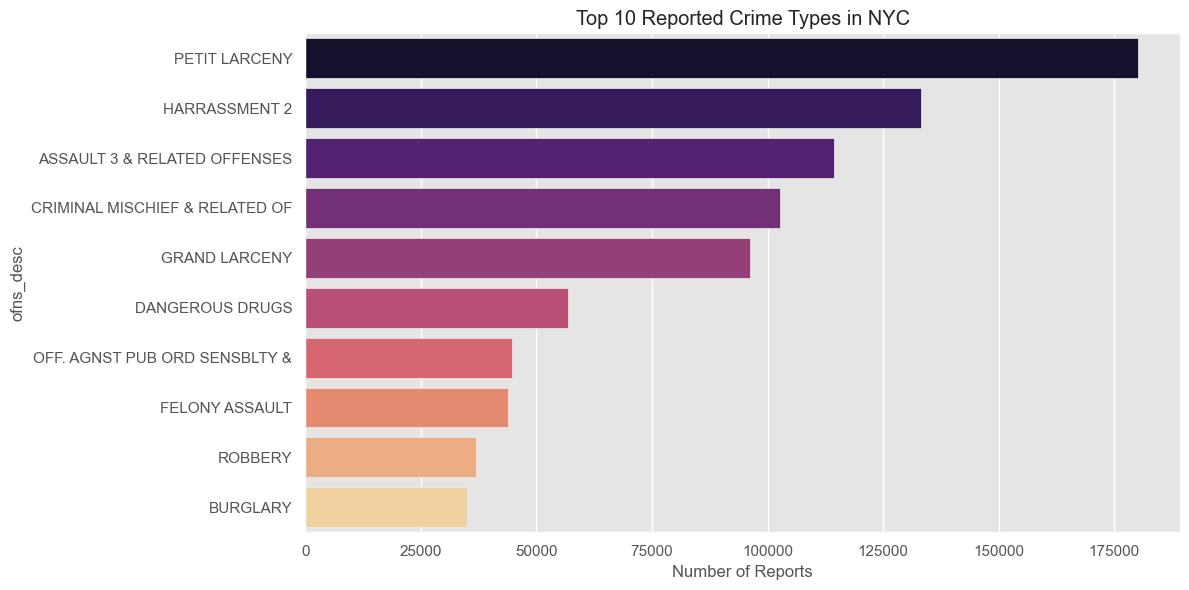

In [ ]:
plt.figure(figsize=(12,6))
top_crimes = df['ofns_desc'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='magma')
plt.title("Top 10 Reported Crime Types in NYC")
plt.xlabel("Number of Reports")
plt.tight_layout()
plt.show()

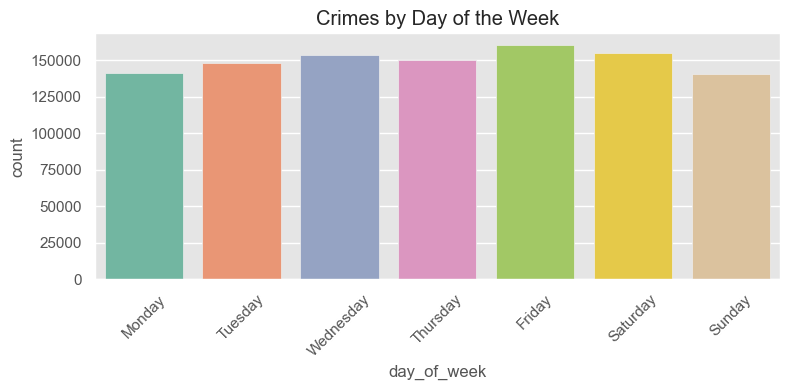

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='day_of_week', order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
], palette='Set2')
plt.title("Crimes by Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


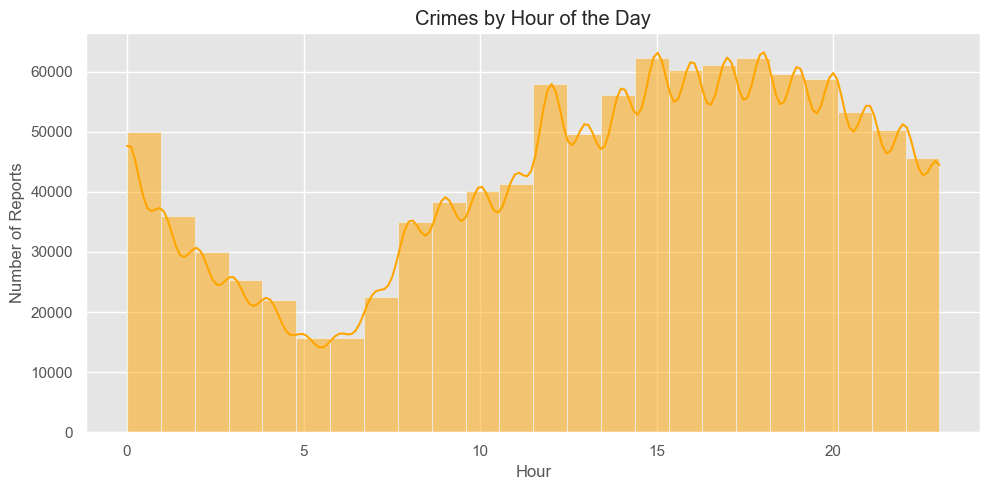

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['hour'].dropna(), bins=24, kde=True, color='orange')
plt.title("Crimes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Reports")
plt.tight_layout()
plt.show()

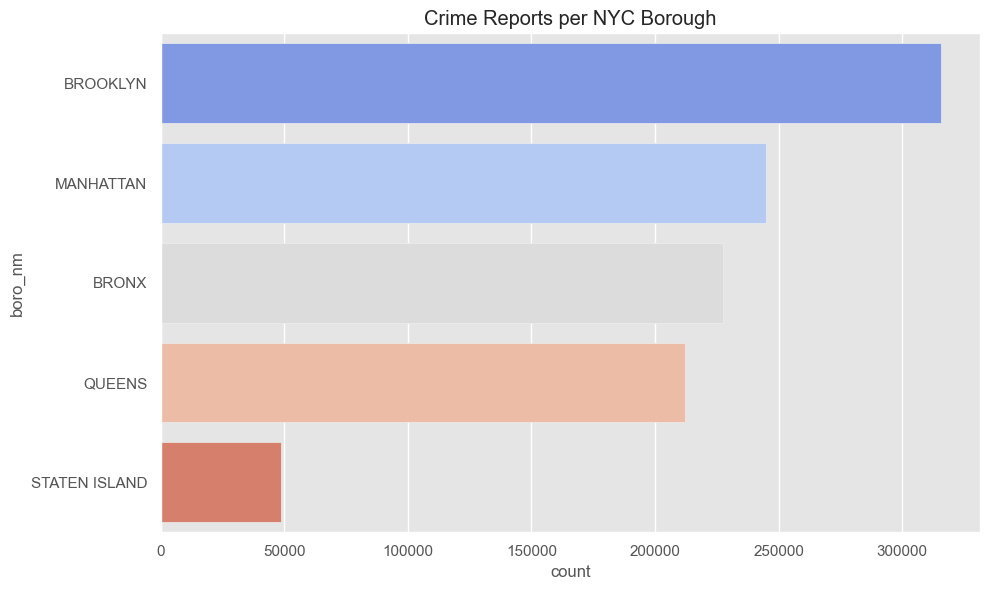

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='boro_nm', order=df['boro_nm'].value_counts().index, palette='coolwarm')
plt.title("Crime Reports per NYC Borough")
plt.tight_layout()
plt.show()


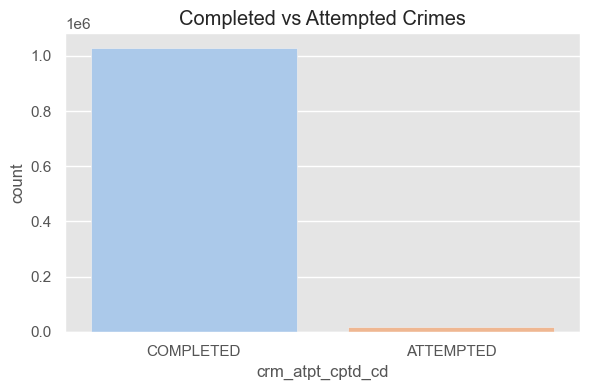

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='crm_atpt_cptd_cd', palette='pastel')
plt.title("Completed vs Attempted Crimes")
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

sample_df = df.dropna(subset=['latitude', 'longitude']).sample(1000)  # Sampling for performance
fig = px.scatter_mapbox(
    sample_df,
    lat="latitude",
    lon="longitude",
    color="boro_nm",
    hover_data=["ofns_desc", "law_cat_cd", "prem_typ_desc"],
    zoom=9,
    height=500,
    title="NYC Crime Incidents (Sample)"
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

KeyError: ['latitude', 'longitude']

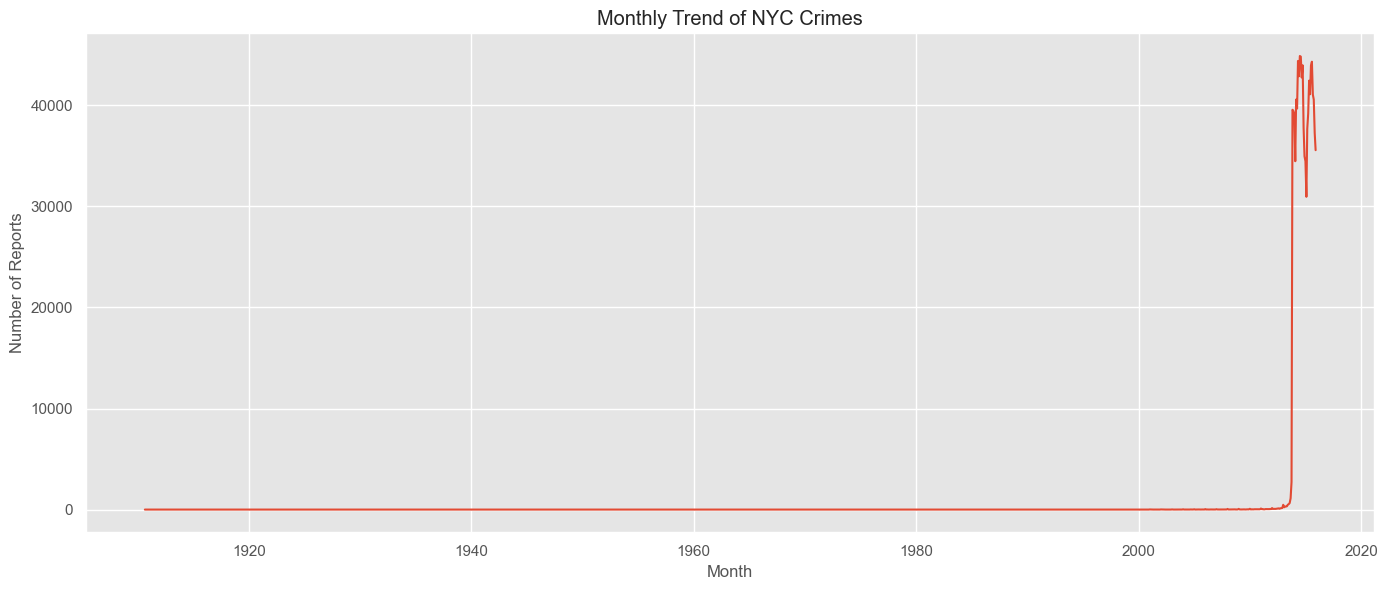

In [ ]:
monthly = df.groupby([df['cmplnt_fr_dt'].dt.to_period("M")]).size().reset_index(name='count')
monthly['cmplnt_fr_dt'] = monthly['cmplnt_fr_dt'].dt.to_timestamp()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly, x='cmplnt_fr_dt', y='count')
plt.title("Monthly Trend of NYC Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.tight_layout()
plt.show()

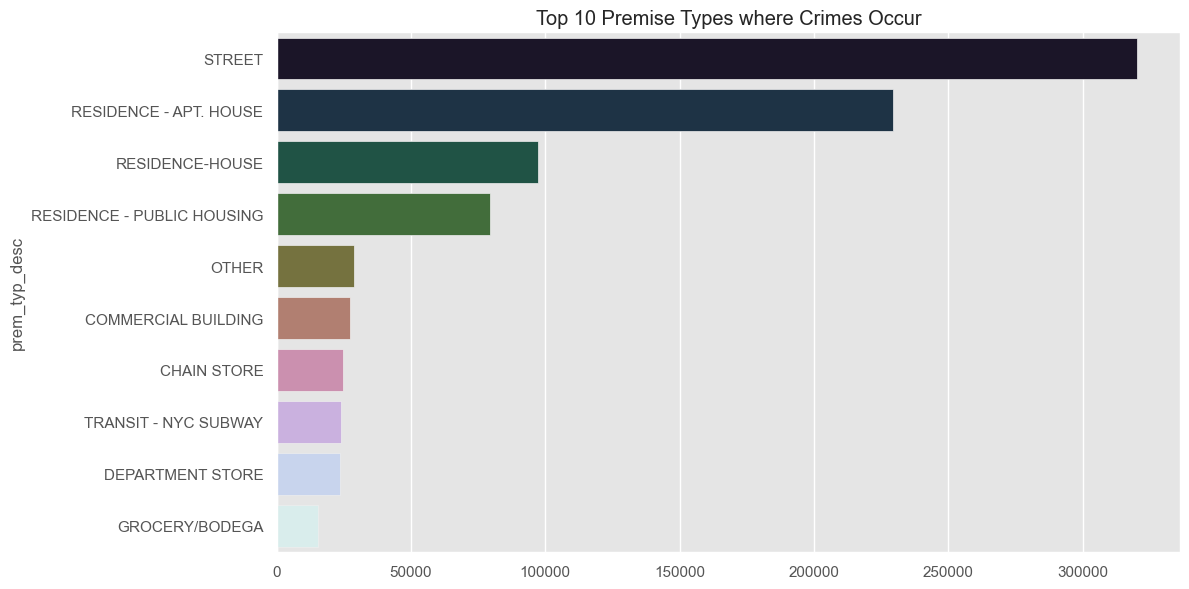

In [ ]:
plt.figure(figsize=(12,6))
top_premises = df['prem_typ_desc'].value_counts().head(10)
sns.barplot(y=top_premises.index, x=top_premises.values, palette="cubehelix")
plt.title("Top 10 Premise Types where Crimes Occur")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

### Map vizualization

Loading NYPD complaint data...


C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\3515353047.py:13: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Cleaned data contains 964140 records
Loading NYC shapefile...
Creating NYC choropleth map with borough labels...


C:\Users\Emma\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: NYC_Borough_Boundary.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


Available fields in shapefile: ['BoroCode', 'BoroName', 'geometry']
Using BoroName for borough names
Performing spatial join...


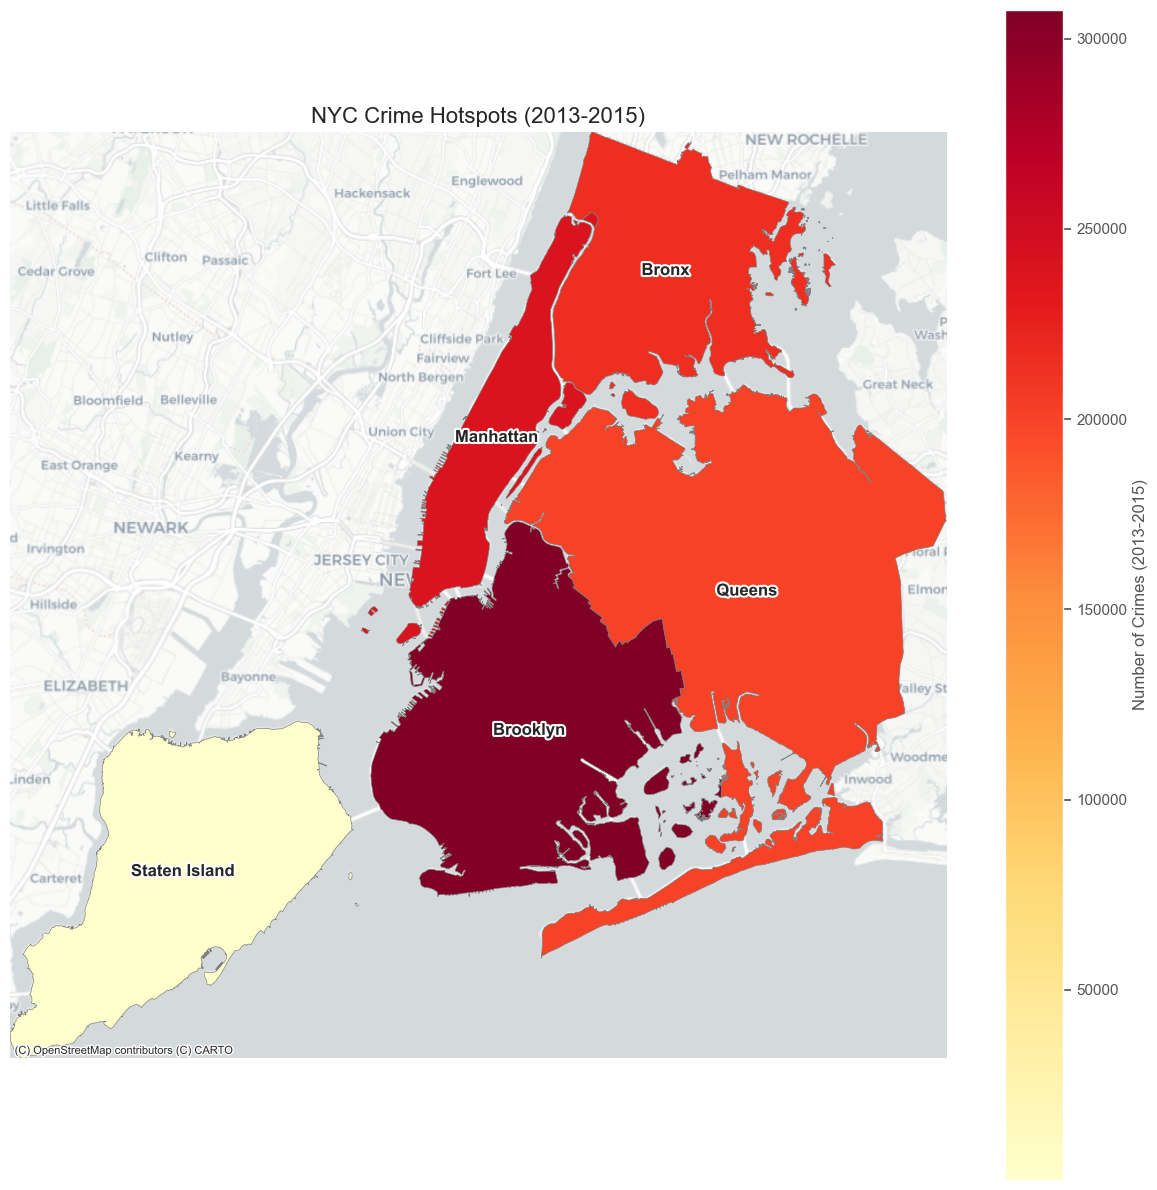

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe

# Load the NYC crime data
def load_and_clean_data(file_path):
    print("Loading NYPD complaint data...")
    df = pd.read_csv(file_path)

    # Convert date columns to datetime
    date_cols = ['CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'RPT_DT']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Filter data for 2013-2015
    df = df[(df['CMPLNT_FR_DT'] >= '2013-01-01') & (df['CMPLNT_FR_DT'] <= '2015-12-31')]

    # Drop rows with missing lat/long
    df = df.dropna(subset=['Latitude', 'Longitude'])

    # Filter out any invalid coordinates (outside NYC boundaries)
    # Tighter boundaries for NYC only
    df = df[(df['Latitude'] > 40.5) & (df['Latitude'] < 40.9) &
            (df['Longitude'] > -74.05) & (df['Longitude'] < -73.7)]

    print(f"Cleaned data contains {len(df)} records")
    return df

# Load NYC shapefile
def load_nyc_shapefile(shapefile_path):
    print("Loading NYC shapefile...")
    nyc_map = gpd.read_file(shapefile_path)
    return nyc_map

# Create a choropleth map focused on NYC with borough labels
def create_nyc_choropleth_with_labels(crime_df, nyc_map):
    print("Creating NYC choropleth map with borough labels...")

    # Create GeoDataFrame from crime data
    geometry = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]
    crime_gdf = gpd.GeoDataFrame(crime_df, geometry=geometry, crs="EPSG:4326")

    # Convert to the same CRS as the shapefile if needed
    if crime_gdf.crs != nyc_map.crs:
        crime_gdf = crime_gdf.to_crs(nyc_map.crs)

    # Check what fields are available in the shapefile
    print(f"Available fields in shapefile: {nyc_map.columns.tolist()}")

    # Find the appropriate borough field name
    borough_field = None
    possible_fields = ['BoroName']

    for field in possible_fields:
        if field in nyc_map.columns:
            borough_field = field
            print(f"Using {field} for borough names")
            break

    if borough_field is None:
        print("Could not find borough field in shapefile. Please check available fields.")
        print("Available fields:", nyc_map.columns.tolist())
        # Try to use the first string column as a fallback
        for col in nyc_map.columns:
            if nyc_map[col].dtype == 'object' and col != 'geometry':
                borough_field = col
                print(f"Using {col} as fallback for labels")
                break

    # Spatial join to count points in each polygon
    print("Performing spatial join...")
    spatial_counts = gpd.sjoin(nyc_map, crime_gdf, how='left', predicate='contains')
    crime_counts = spatial_counts.groupby(spatial_counts.index).size().reset_index(name='crime_count')

    # Join back to original shapefile
    merged_data = nyc_map.join(crime_counts.set_index('index'), how='left')
    merged_data['crime_count'] = merged_data['crime_count'].fillna(0)

    # Create plot
    fig, ax = plt.subplots(figsize=(12, 12))

    # Custom colormap from light yellow to dark red
    colors = ['#ffffcc', '#ffeda0', '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026']
    cmap = LinearSegmentedColormap.from_list('crime_cmap', colors)

    # Plot choropleth
    merged_data.plot(column='crime_count', cmap=cmap, linewidth=0.5,
                   ax=ax, edgecolor='0.5', legend=True,
                   legend_kwds={'label': "Number of Crimes (2013-2015)",
                               'orientation': "vertical"})

    # Add basemap for context
    try:
        ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
    except Exception as e:
        print(f"Could not add basemap: {str(e)}")

    # Set the map extent to focus on NYC
    # These bounds are for NYC area only (in the CRS of the map)
    bounds = merged_data.total_bounds
    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])

    # Add borough labels
    if borough_field:
        for idx, row in merged_data.iterrows():
            # Get centroid of each borough polygon
            centroid = row.geometry.centroid
            # Get the borough name
            label = row[borough_field]

            # Add text with white outline for better visibility
            ax.text(centroid.x, centroid.y, label,
                  fontsize=12, weight='bold', ha='center', va='center',
                  path_effects=[pe.withStroke(linewidth=3, foreground='white')])

    # Remove axes
    ax.set_axis_off()

    # Add a title
    plt.title('NYC Crime Hotspots (2013-2015)', fontsize=16)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # File paths
    crime_data_path = 'NYC Crime.csv'  # Update with your file path
    nyc_shapefile_path = 'NYC_Borough_Boundary.shp'  # Update with your borough shapefile path

    # Load and clean data
    crime_df = load_and_clean_data(crime_data_path)

    # Load NYC shapefile
    try:
        nyc_map = load_nyc_shapefile(nyc_shapefile_path)
        # Create choropleth map with borough labels
        create_nyc_choropleth_with_labels(crime_df, nyc_map)
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

### Brooklyn Analysis (the one with higher crimes)

Loading and analyzing Brooklyn crime data...


C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\1833646686.py:10: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Total crimes in Brooklyn: 314560


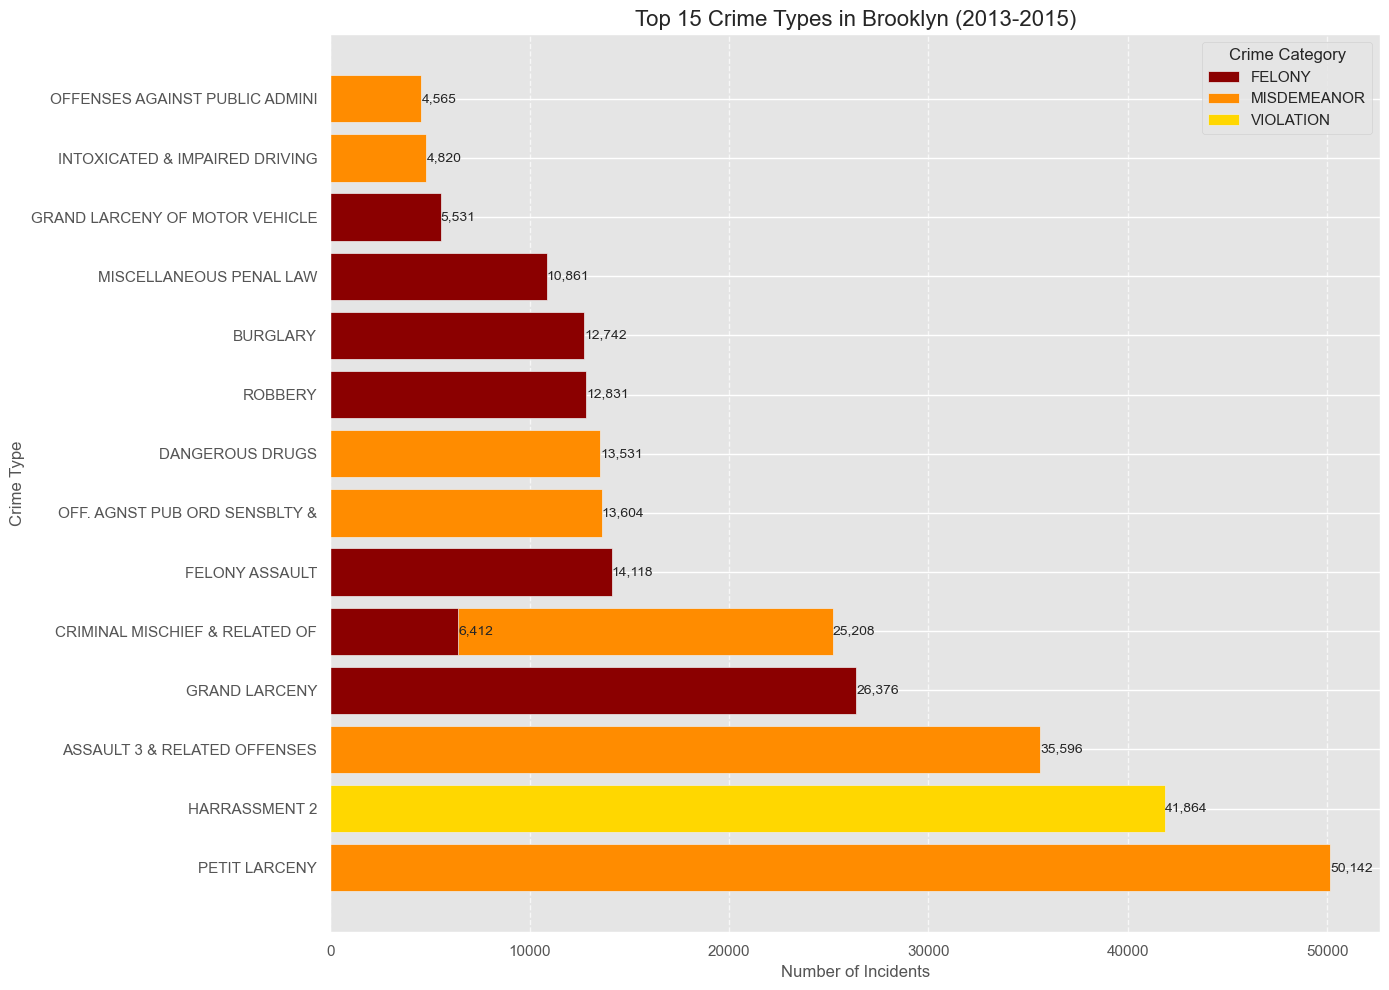

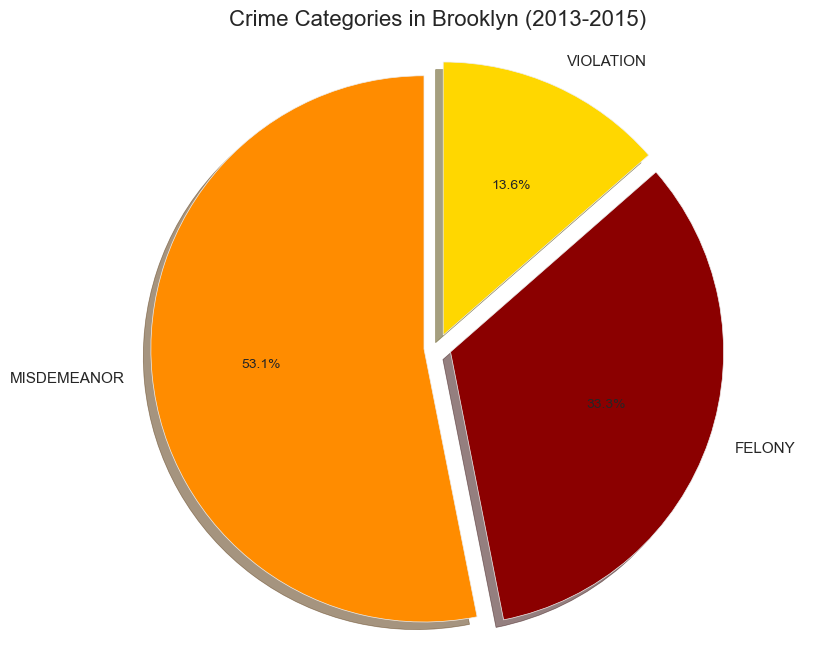

C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\1833646686.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df['Month'] = brooklyn_df['CMPLNT_FR_DT'].dt.to_period('M')


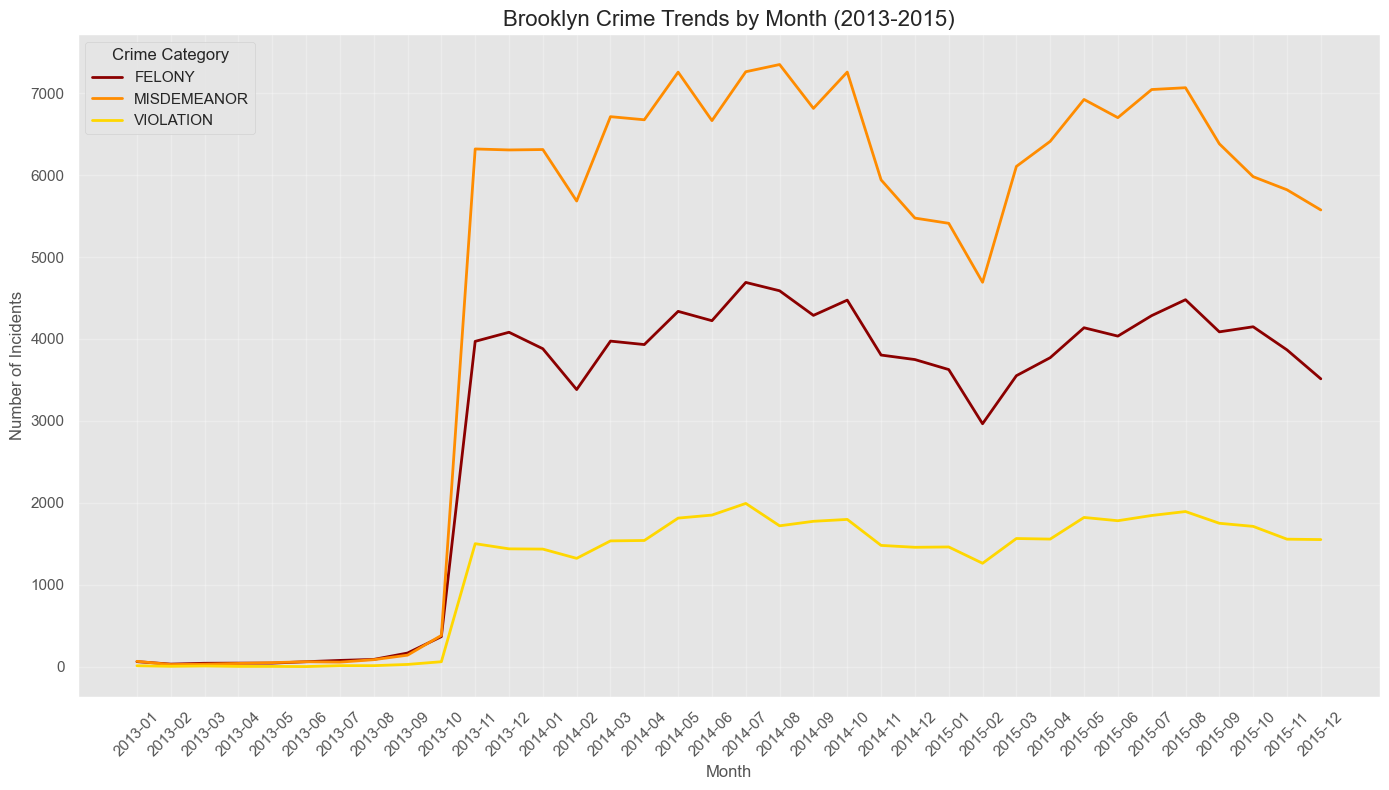

C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\1833646686.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df['Hour'] = pd.to_datetime(brooklyn_df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.hour


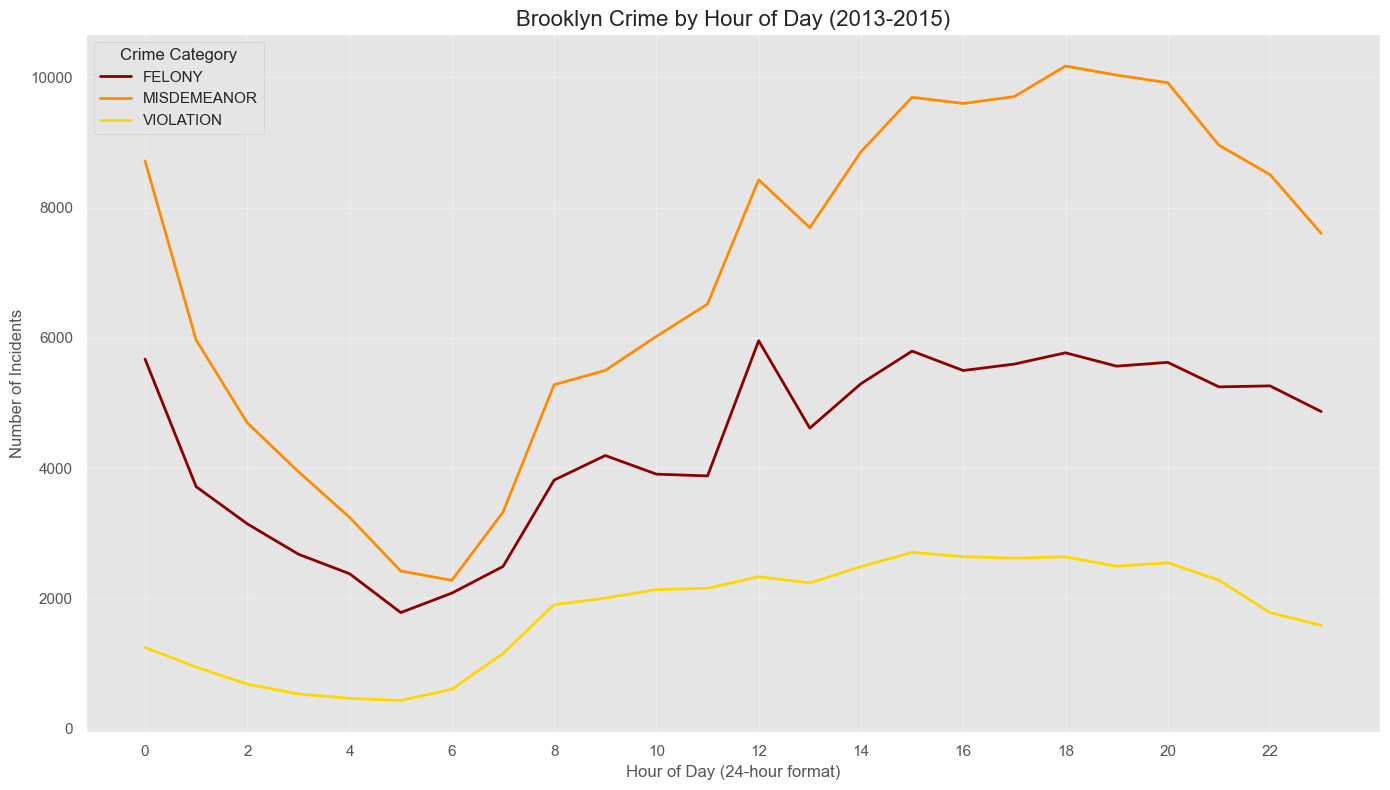


Top 15 Crime Types in Brooklyn (2013-2015):
1. PETIT LARCENY (MISDEMEANOR): 50,142 incidents
2. HARRASSMENT 2 (VIOLATION): 41,864 incidents
3. ASSAULT 3 & RELATED OFFENSES (MISDEMEANOR): 35,596 incidents
4. GRAND LARCENY (FELONY): 26,376 incidents
5. CRIMINAL MISCHIEF & RELATED OF (MISDEMEANOR): 25,208 incidents
6. FELONY ASSAULT (FELONY): 14,118 incidents
7. OFF. AGNST PUB ORD SENSBLTY & (MISDEMEANOR): 13,604 incidents
8. DANGEROUS DRUGS (MISDEMEANOR): 13,531 incidents
9. ROBBERY (FELONY): 12,831 incidents
10. BURGLARY (FELONY): 12,742 incidents
11. MISCELLANEOUS PENAL LAW (FELONY): 10,861 incidents
12. CRIMINAL MISCHIEF & RELATED OF (FELONY): 6,412 incidents
13. GRAND LARCENY OF MOTOR VEHICLE (FELONY): 5,531 incidents
14. INTOXICATED & IMPAIRED DRIVING (MISDEMEANOR): 4,820 incidents
15. OFFENSES AGAINST PUBLIC ADMINI (MISDEMEANOR): 4,565 incidents


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_brooklyn_crimes(file_path):
    print("Loading and analyzing Brooklyn crime data...")

    # Load the data
    df = pd.read_csv(file_path)

    # Convert date columns to datetime
    date_cols = ['CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'RPT_DT']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Filter data for 2013-2015
    df = df[(df['CMPLNT_FR_DT'] >= '2013-01-01') & (df['CMPLNT_FR_DT'] <= '2015-12-31')]

    # Filter for Brooklyn only
    brooklyn_df = df[df['BORO_NM'] == 'BROOKLYN']
    print(f"Total crimes in Brooklyn: {len(brooklyn_df)}")

    # Count crimes by type
    if 'OFNS_DESC' in brooklyn_df.columns:
        # Group by offense description and law category
        crime_counts = brooklyn_df.groupby(['OFNS_DESC', 'LAW_CAT_CD']).size().reset_index(name='Count')
        crime_counts = crime_counts.sort_values('Count', ascending=False)

        # Get top 15 crimes
        top_crimes = crime_counts.head(15)

        # Create color mapping for crime categories
        category_colors = {
            'FELONY': '#8B0000',      # Dark red
            'MISDEMEANOR': '#FF8C00', # Dark orange
            'VIOLATION': '#FFD700'    # Gold
        }

        # Create figure for top crimes bar chart
        plt.figure(figsize=(14, 10))

        # Create horizontal bar chart
        bars = plt.barh(top_crimes['OFNS_DESC'], top_crimes['Count'],
                        color=[category_colors.get(cat, 'gray') for cat in top_crimes['LAW_CAT_CD']])

        # Add count labels to bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{int(width):,}', ha='left', va='center', fontsize=10)

        # Add labels and title
        plt.xlabel('Number of Incidents', fontsize=12)
        plt.ylabel('Crime Type', fontsize=12)
        plt.title('Top 15 Crime Types in Brooklyn (2013-2015)', fontsize=16)

        # Add a legend for crime categories
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=category_colors[cat], label=cat)
                          for cat in category_colors.keys()
                          if cat in top_crimes['LAW_CAT_CD'].values]
        plt.legend(handles=legend_elements, title='Crime Category')

        # Adjust layout and show
        plt.tight_layout()
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.show()

        # Create a pie chart of the crime categories in Brooklyn
        plt.figure(figsize=(10, 8))
        category_counts = brooklyn_df['LAW_CAT_CD'].value_counts()
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
               colors=[category_colors.get(cat, 'gray') for cat in category_counts.index],
               explode=[0.05] * len(category_counts), shadow=True, startangle=90)
        plt.title('Crime Categories in Brooklyn (2013-2015)', fontsize=16)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.show()

        # Analyze crime trends over time in Brooklyn
        brooklyn_df['Month'] = brooklyn_df['CMPLNT_FR_DT'].dt.to_period('M')
        monthly_counts = brooklyn_df.groupby(['Month', 'LAW_CAT_CD']).size().unstack(fill_value=0)

        # Plot time series
        plt.figure(figsize=(14, 8))
        for category in monthly_counts.columns:
            plt.plot(monthly_counts.index.astype(str), monthly_counts[category],
                    label=category, linewidth=2, color=category_colors.get(category, 'gray'))

        plt.title('Brooklyn Crime Trends by Month (2013-2015)', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Number of Incidents', fontsize=12)
        plt.legend(title='Crime Category')
        plt.xticks(rotation=45)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Analyze time of day patterns
        if 'CMPLNT_FR_TM' in brooklyn_df.columns:
            # Extract hour from time
            brooklyn_df['Hour'] = pd.to_datetime(brooklyn_df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.hour

            # Group by hour and category
            hourly_counts = brooklyn_df.groupby(['Hour', 'LAW_CAT_CD']).size().unstack(fill_value=0)

            # Plot time of day patterns
            plt.figure(figsize=(14, 8))
            for category in hourly_counts.columns:
                plt.plot(hourly_counts.index, hourly_counts[category],
                        label=category, linewidth=2, color=category_colors.get(category, 'gray'))

            plt.title('Brooklyn Crime by Hour of Day (2013-2015)', fontsize=16)
            plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
            plt.ylabel('Number of Incidents', fontsize=12)
            plt.legend(title='Crime Category')
            plt.xticks(range(0, 24, 2))
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()

        return top_crimes
    else:
        print("Offense description column not found in the data")
        return None

def main():
    # File path to the crime data
    crime_data_path = 'NYC Crime.csv'  # Update with your file path

    # Analyze Brooklyn crimes
    brooklyn_top_crimes = analyze_brooklyn_crimes(crime_data_path)

    # Print the top crimes table
    if brooklyn_top_crimes is not None:
        print("\nTop 15 Crime Types in Brooklyn (2013-2015):")
        for i, (index, row) in enumerate(brooklyn_top_crimes.iterrows(), 1):
            print(f"{i}. {row['OFNS_DESC']} ({row['LAW_CAT_CD']}): {row['Count']:,} incidents")

if __name__ == "__main__":
    main()

In [ ]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,317154175,11/01/2013,20:30:00,11/01/2013,21:00:00,11/01/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,40.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1006185.0,233271.0,40.806932,-73.920767,"(40.806931888, -73.920766811)"
1048571,833410354,11/01/2013,20:28:00,11/01/2013,20:31:00,11/01/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,75.0,FRONT OF,GROCERY/BODEGA,NaN,NaN,1013319.0,180075.0,40.660901,-73.895227,"(40.660901484, -73.895226891)"
1048572,961949188,11/01/2013,20:25:00,NaN,NaN,11/01/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,1.0,INSIDE,FAST FOOD,NaN,NaN,982953.0,203013.0,40.723909,-74.004681,"(40.723908621, -74.004680695)"
1048573,157608118,11/01/2013,20:25:00,11/01/2013,20:45:00,11/01/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,52.0,FRONT OF,STREET,NaN,NaN,1019388.0,259017.0,40.877554,-73.872939,"(40.877554428, -73.872939471)"


### Models

### 1. XGBoost for crime Hotspot prediction

C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\2942587407.py:11: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC Crime.csv')


Processed data shape: (88355, 4)
Number of unique grid cells: 398
Number of unique time periods: 288
Mean Squared Error: 35.7646
Root Mean Squared Error: 5.9803
R² Score: 0.8335


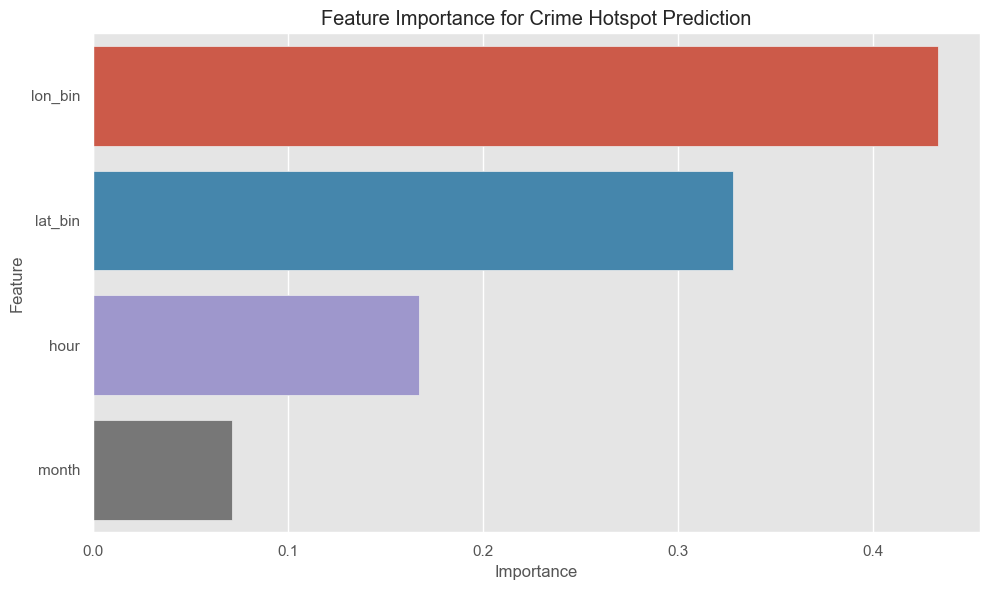

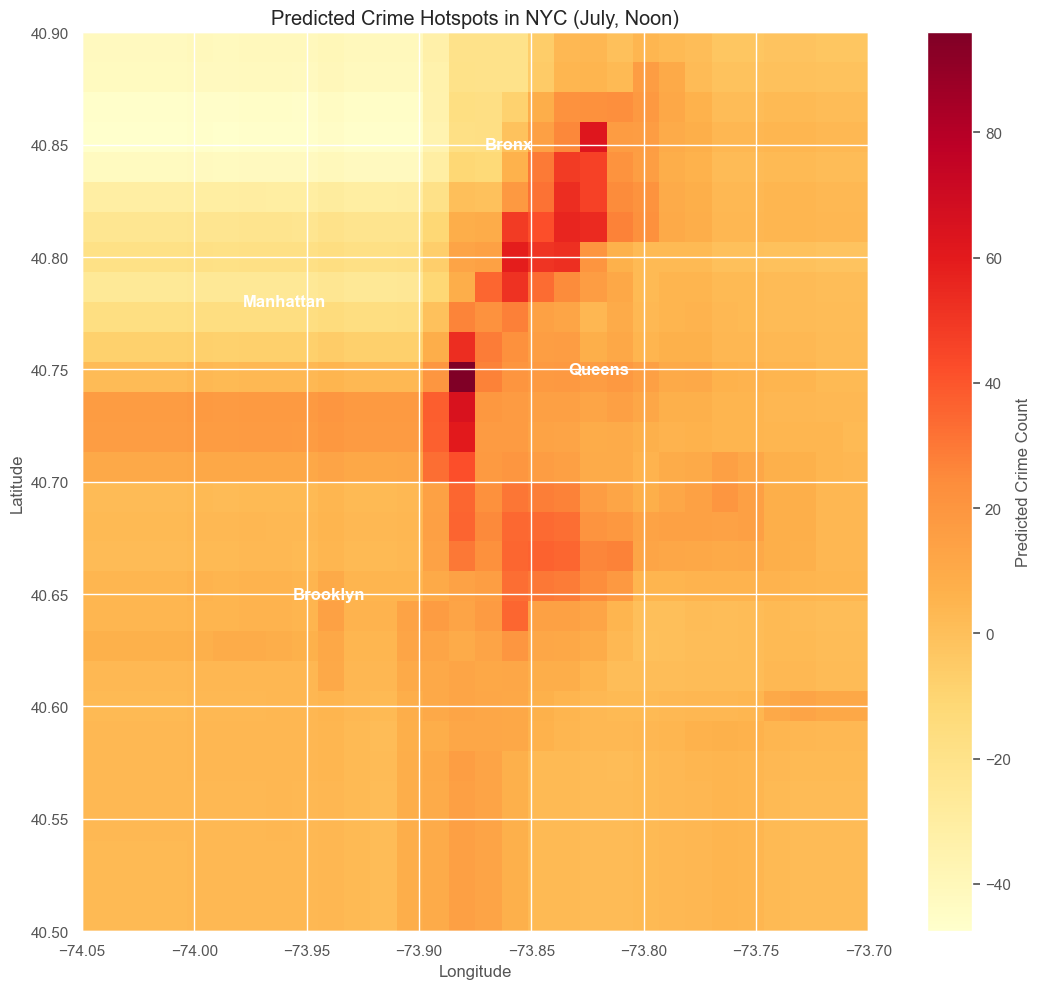

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data - update path to your file
df = pd.read_csv('NYC Crime.csv')

# Convert date columns
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Filter data for 2013-2015
df = df[(df['CMPLNT_FR_DT'] >= '2013-01-01') & (df['CMPLNT_FR_DT'] <= '2015-12-31')]

# Drop rows with missing essential features
df = df.dropna(subset=['Latitude', 'Longitude', 'CMPLNT_FR_DT'])

# Extract temporal features
df['year'] = df['CMPLNT_FR_DT'].dt.year
df['month'] = df['CMPLNT_FR_DT'].dt.month
df['day'] = df['CMPLNT_FR_DT'].dt.day
df['dayofweek'] = df['CMPLNT_FR_DT'].dt.dayofweek

# Convert time if available
if 'CMPLNT_FR_TM' in df.columns:
    df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')
    df['hour'] = df['CMPLNT_FR_TM'].dt.hour

# Create spatial grid for NYC
lat_bins = 30  # number of latitude divisions
lon_bins = 30  # number of longitude divisions

# Compute NYC boundaries
lat_min, lat_max = 40.5, 40.9
lon_min, lon_max = -74.05, -73.7

# Create grid cell identifiers
df['lat_bin'] = pd.cut(df['Latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['Longitude'], bins=lon_bins, labels=False)

# Create a unique identifier for each grid cell
df['grid_id'] = df['lat_bin'] * 1000 + df['lon_bin']

# Create unique identifier for temporal features (e.g., month and hour)
if 'hour' in df.columns:
    df['time_id'] = df['month'] * 100 + df['hour']
    time_feature = 'hour'
else:
    df['time_id'] = df['month'] * 100 + df['dayofweek']
    time_feature = 'dayofweek'

# Count crimes by grid cell and time period
crime_counts = df.groupby(['grid_id', 'time_id']).size().reset_index(name='crime_count')

# Create feature matrix
grid_data = crime_counts.copy()

# Extract spatial and temporal components
grid_data['lat_bin'] = grid_data['grid_id'] // 1000
grid_data['lon_bin'] = grid_data['grid_id'] % 1000

if time_feature == 'hour':
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['hour'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'hour']
else:
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['dayofweek'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'dayofweek']

# Extract features and target
X = grid_data[feature_columns]
y = grid_data['crime_count']

print(f"Processed data shape: {X.shape}")
print(f"Number of unique grid cells: {grid_data['grid_id'].nunique()}")
print(f"Number of unique time periods: {grid_data['time_id'].nunique()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_model.feature_importances_
})
importance = importance.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Crime Hotspot Prediction')
plt.tight_layout()
plt.show()

# Visualize predictions on NYC map
# Create a grid for visualization
lat_step = (lat_max - lat_min) / lat_bins
lon_step = (lon_max - lon_min) / lon_bins

# For visualization, predict crime hotspots for July (month=7) at noon/Saturday
month = 7  # July

if time_feature == 'hour':
    time_value = 12  # Noon
    time_desc = "Noon"
else:
    time_value = 6  # Saturday
    time_desc = "Saturday"

# Build prediction grid
grid_points = []
for i in range(lat_bins):
    for j in range(lon_bins):
        if time_feature == 'hour':
            grid_points.append([i, j, month, time_value])
        else:
            grid_points.append([i, j, month, time_value])

# Convert to DataFrame
pred_grid = pd.DataFrame(grid_points, columns=feature_columns)

# Scale features
pred_grid_scaled = scaler.transform(pred_grid)

# Make predictions
pred_counts = xgb_model.predict(pred_grid_scaled)

# Reshape for heatmap
heatmap_data = np.zeros((lat_bins, lon_bins))
for idx, (i, j, _, _) in enumerate(grid_points):
    heatmap_data[int(i), int(j)] = pred_counts[idx]

# Plot heatmap
plt.figure(figsize=(12, 10))
plt.imshow(heatmap_data, cmap='YlOrRd', origin='lower',
          extent=[lon_min, lon_max, lat_min, lat_max])

plt.colorbar(label='Predicted Crime Count')
plt.title(f'Predicted Crime Hotspots in NYC (July, {time_desc})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add borough labels
borough_positions = {
    'Manhattan': (-73.96, 40.78),
    'Brooklyn': (-73.94, 40.65),
    'Queens': (-73.82, 40.75),
    'Bronx': (-73.86, 40.85),
    'Staten Island': (-74.15, 40.58)
}

for borough, (lon, lat) in borough_positions.items():
    if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
        plt.text(lon, lat, borough, fontsize=12, ha='center', va='center',
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### 2. Random Forest model

C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\3322865009.py:11: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC Crime.csv')


Processed data shape: (88355, 4)
Number of unique grid cells: 398
Number of unique time periods: 288
Mean Squared Error: 59.2133
Root Mean Squared Error: 7.6950
R² Score: 0.7243


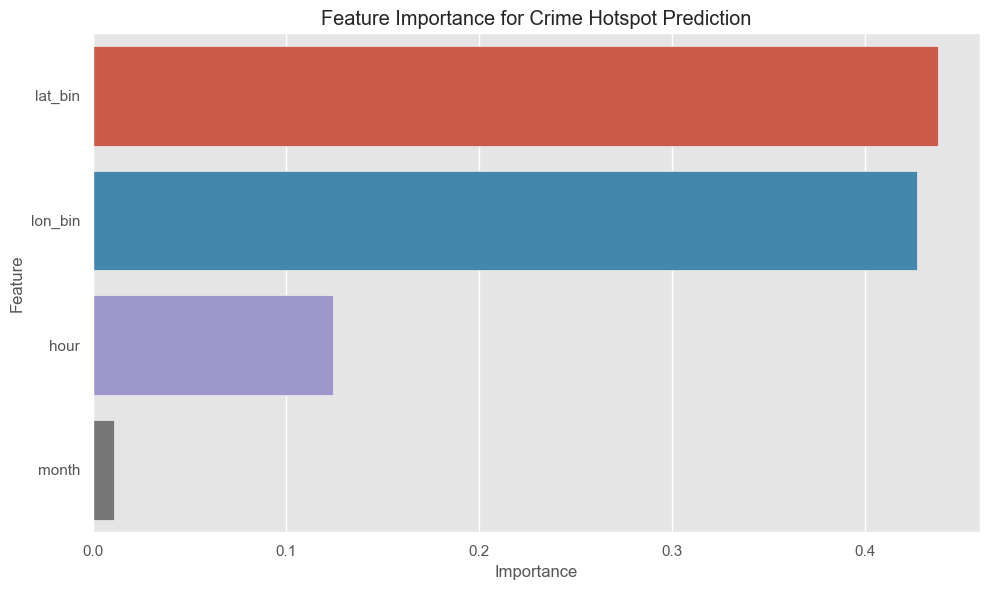

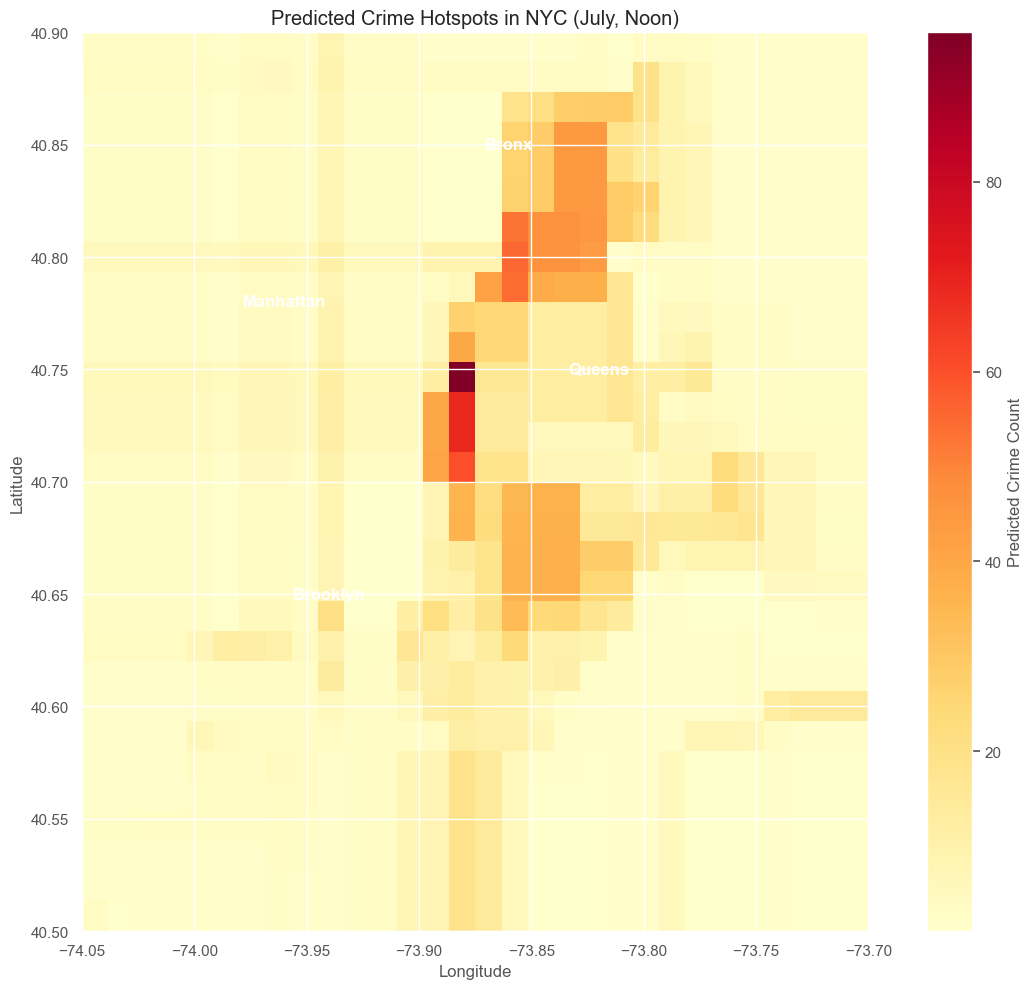

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data - update path to your file
df = pd.read_csv('NYC Crime.csv')

# Convert date columns
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Filter data for 2013-2015
df = df[(df['CMPLNT_FR_DT'] >= '2013-01-01') & (df['CMPLNT_FR_DT'] <= '2015-12-31')]

# Drop rows with missing essential features
df = df.dropna(subset=['Latitude', 'Longitude', 'CMPLNT_FR_DT'])

# Extract temporal features
df['year'] = df['CMPLNT_FR_DT'].dt.year
df['month'] = df['CMPLNT_FR_DT'].dt.month
df['day'] = df['CMPLNT_FR_DT'].dt.day
df['dayofweek'] = df['CMPLNT_FR_DT'].dt.dayofweek

# Convert time if available
if 'CMPLNT_FR_TM' in df.columns:
    df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')
    df['hour'] = df['CMPLNT_FR_TM'].dt.hour

# Create spatial grid for NYC
lat_bins = 30  # number of latitude divisions
lon_bins = 30  # number of longitude divisions

# Compute NYC boundaries
lat_min, lat_max = 40.5, 40.9
lon_min, lon_max = -74.05, -73.7

# Create grid cell identifiers
df['lat_bin'] = pd.cut(df['Latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['Longitude'], bins=lon_bins, labels=False)

# Create a unique identifier for each grid cell
df['grid_id'] = df['lat_bin'] * 1000 + df['lon_bin']

# Create unique identifier for temporal features (e.g., month and hour)
if 'hour' in df.columns:
    df['time_id'] = df['month'] * 100 + df['hour']
    time_feature = 'hour'
else:
    df['time_id'] = df['month'] * 100 + df['dayofweek']
    time_feature = 'dayofweek'

# Count crimes by grid cell and time period
crime_counts = df.groupby(['grid_id', 'time_id']).size().reset_index(name='crime_count')

# Create feature matrix
grid_data = crime_counts.copy()

# Extract spatial and temporal components
grid_data['lat_bin'] = grid_data['grid_id'] // 1000
grid_data['lon_bin'] = grid_data['grid_id'] % 1000

if time_feature == 'hour':
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['hour'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'hour']
else:
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['dayofweek'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'dayofweek']

# Extract features and target
X = grid_data[feature_columns]
y = grid_data['crime_count']

print(f"Processed data shape: {X.shape}")
print(f"Number of unique grid cells: {grid_data['grid_id'].nunique()}")
print(f"Number of unique time periods: {grid_data['time_id'].nunique()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
})
importance = importance.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Crime Hotspot Prediction')
plt.tight_layout()
plt.show()

# Visualize predictions on NYC map
# Create a grid for visualization
lat_step = (lat_max - lat_min) / lat_bins
lon_step = (lon_max - lon_min) / lon_bins

# For visualization, predict crime hotspots for July (month=7) at noon/Saturday
month = 7  # July

if time_feature == 'hour':
    time_value = 12  # Noon
    time_desc = "Noon"
else:
    time_value = 6  # Saturday
    time_desc = "Saturday"

# Build prediction grid
grid_points = []
for i in range(lat_bins):
    for j in range(lon_bins):
        if time_feature == 'hour':
            grid_points.append([i, j, month, time_value])
        else:
            grid_points.append([i, j, month, time_value])

# Convert to DataFrame
pred_grid = pd.DataFrame(grid_points, columns=feature_columns)

# Scale features
pred_grid_scaled = scaler.transform(pred_grid)

# Make predictions
pred_counts = rf_model.predict(pred_grid_scaled)

# Reshape for heatmap
heatmap_data = np.zeros((lat_bins, lon_bins))
for idx, (i, j, _, _) in enumerate(grid_points):
    heatmap_data[int(i), int(j)] = pred_counts[idx]

# Plot heatmap
plt.figure(figsize=(12, 10))
plt.imshow(heatmap_data, cmap='YlOrRd', origin='lower',
          extent=[lon_min, lon_max, lat_min, lat_max])

plt.colorbar(label='Predicted Crime Count')
plt.title(f'Predicted Crime Hotspots in NYC (July, {time_desc})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add borough labels
borough_positions = {
    'Manhattan': (-73.96, 40.78),
    'Brooklyn': (-73.94, 40.65),
    'Queens': (-73.82, 40.75),
    'Bronx': (-73.86, 40.85),
    'Staten Island': (-74.15, 40.58)
}

for borough, (lon, lat) in borough_positions.items():
    if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
        plt.text(lon, lat, borough, fontsize=12, ha='center', va='center',
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### 3. lightGBM Crime Hotspot prediction

C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\137643807.py:11: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC Crime.csv')


Processed data shape: (88355, 4)
Number of unique grid cells: 398
Number of unique time periods: 288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 61848, number of used features: 4
[LightGBM] [Info] Start training from score 11.473661
Mean Squared Error: 35.2024
Root Mean Squared Error: 5.9332
R² Score: 0.8361


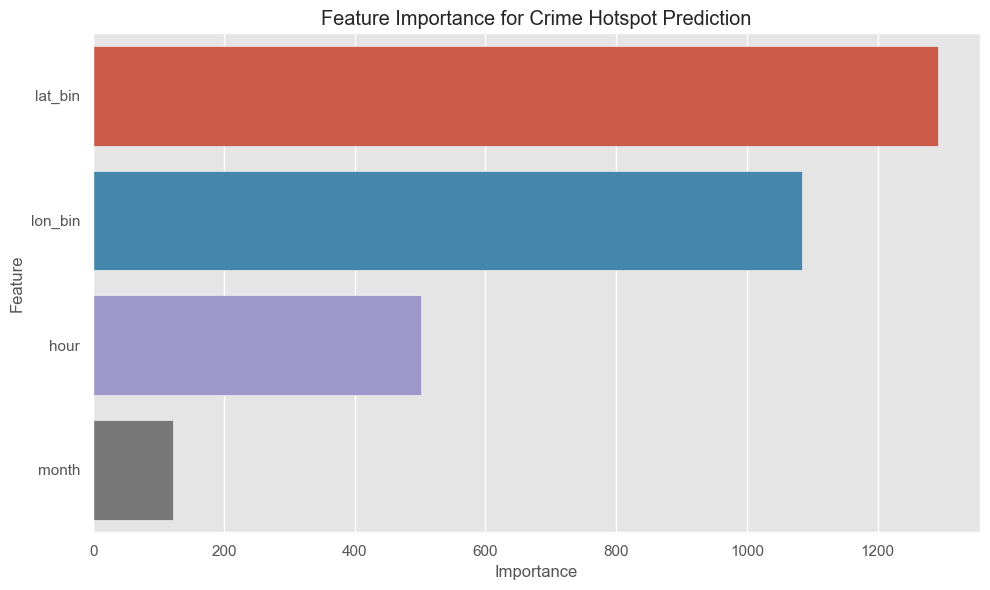

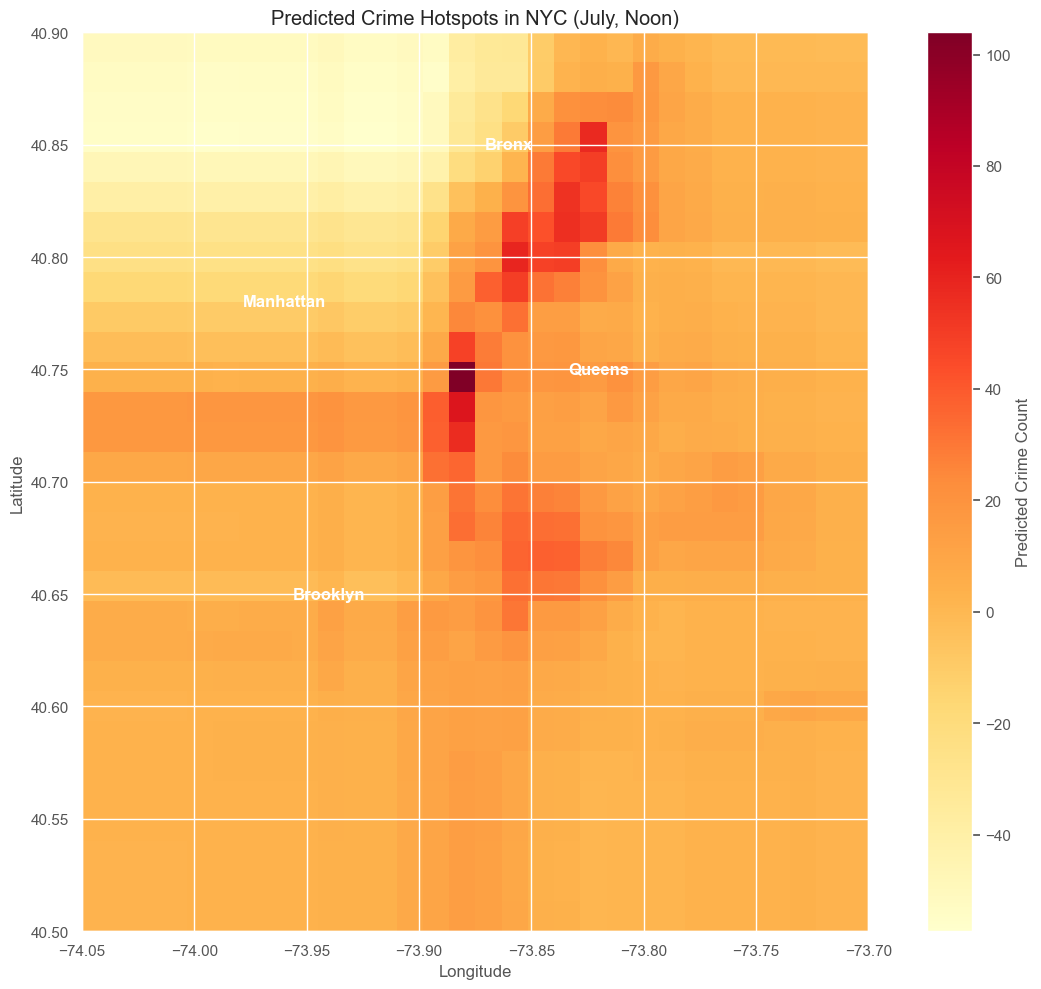

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data - update path to your file
df = pd.read_csv('NYC Crime.csv')

# Convert date columns
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Filter data for 2013-2015
df = df[(df['CMPLNT_FR_DT'] >= '2013-01-01') & (df['CMPLNT_FR_DT'] <= '2015-12-31')]

# Drop rows with missing essential features
df = df.dropna(subset=['Latitude', 'Longitude', 'CMPLNT_FR_DT'])

# Extract temporal features
df['year'] = df['CMPLNT_FR_DT'].dt.year
df['month'] = df['CMPLNT_FR_DT'].dt.month
df['day'] = df['CMPLNT_FR_DT'].dt.day
df['dayofweek'] = df['CMPLNT_FR_DT'].dt.dayofweek

# Convert time if available
if 'CMPLNT_FR_TM' in df.columns:
    df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')
    df['hour'] = df['CMPLNT_FR_TM'].dt.hour

# Create spatial grid for NYC
lat_bins = 30  # number of latitude divisions
lon_bins = 30  # number of longitude divisions

# Compute NYC boundaries
lat_min, lat_max = 40.5, 40.9
lon_min, lon_max = -74.05, -73.7

# Create grid cell identifiers
df['lat_bin'] = pd.cut(df['Latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['Longitude'], bins=lon_bins, labels=False)

# Create a unique identifier for each grid cell
df['grid_id'] = df['lat_bin'] * 1000 + df['lon_bin']

# Create unique identifier for temporal features (e.g., month and hour)
if 'hour' in df.columns:
    df['time_id'] = df['month'] * 100 + df['hour']
    time_feature = 'hour'
else:
    df['time_id'] = df['month'] * 100 + df['dayofweek']
    time_feature = 'dayofweek'

# Count crimes by grid cell and time period
crime_counts = df.groupby(['grid_id', 'time_id']).size().reset_index(name='crime_count')

# Create feature matrix
grid_data = crime_counts.copy()

# Extract spatial and temporal components
grid_data['lat_bin'] = grid_data['grid_id'] // 1000
grid_data['lon_bin'] = grid_data['grid_id'] % 1000

if time_feature == 'hour':
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['hour'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'hour']
else:
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['dayofweek'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'dayofweek']

# Extract features and target
X = grid_data[feature_columns]
y = grid_data['crime_count']

print(f"Processed data shape: {X.shape}")
print(f"Number of unique grid cells: {grid_data['grid_id'].nunique()}")
print(f"Number of unique time periods: {grid_data['time_id'].nunique()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='regression',
    random_state=42
)

lgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': lgb_model.feature_importances_
})
importance = importance.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Crime Hotspot Prediction')
plt.tight_layout()
plt.show()

# Visualize predictions on NYC map
# Create a grid for visualization
lat_step = (lat_max - lat_min) / lat_bins
lon_step = (lon_max - lon_min) / lon_bins

# For visualization, predict crime hotspots for July (month=7) at noon/Saturday
month = 7  # July

if time_feature == 'hour':
    time_value = 12  # Noon
    time_desc = "Noon"
else:
    time_value = 6  # Saturday
    time_desc = "Saturday"

# Build prediction grid
grid_points = []
for i in range(lat_bins):
    for j in range(lon_bins):
        if time_feature == 'hour':
            grid_points.append([i, j, month, time_value])
        else:
            grid_points.append([i, j, month, time_value])

# Convert to DataFrame
pred_grid = pd.DataFrame(grid_points, columns=feature_columns)

# Scale features
pred_grid_scaled = scaler.transform(pred_grid)

# Make predictions
pred_counts = lgb_model.predict(pred_grid_scaled)

# Reshape for heatmap
heatmap_data = np.zeros((lat_bins, lon_bins))
for idx, (i, j, _, _) in enumerate(grid_points):
    heatmap_data[int(i), int(j)] = pred_counts[idx]

# Plot heatmap
plt.figure(figsize=(12, 10))
plt.imshow(heatmap_data, cmap='YlOrRd', origin='lower',
          extent=[lon_min, lon_max, lat_min, lat_max])

plt.colorbar(label='Predicted Crime Count')
plt.title(f'Predicted Crime Hotspots in NYC (July, {time_desc})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add borough labels
borough_positions = {
    'Manhattan': (-73.96, 40.78),
    'Brooklyn': (-73.94, 40.65),
    'Queens': (-73.82, 40.75),
    'Bronx': (-73.86, 40.85),
    'Staten Island': (-74.15, 40.58)
}

for borough, (lon, lat) in borough_positions.items():
    if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
        plt.text(lon, lat, borough, fontsize=12, ha='center', va='center',
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 330.3 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.5 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.5 MB 178.6 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.5 MB 327.3 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.5 MB 368.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.5 MB 368.6 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.5 MB 427.9 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.5 MB 504.4 kB/s eta 0:00:03
   ----- ----------------------

### Models comparison

Loading and preprocessing data...


C:\Users\Emma\AppData\Local\Temp\ipykernel_18620\1834817960.py:16: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC Crime.csv')


Processed data shape: (88355, 4)
Median crime count: 6.0
High crime areas: 43083, Low crime areas: 45272

Training XGBoost model...
Training time: 1.08 seconds
Mean Squared Error: 33.0511
Root Mean Squared Error: 5.7490
Mean Absolute Error: 3.6752
R² Score: 0.8459
ROC AUC: 0.9376

Training Random Forest model...
Training time: 9.04 seconds
Mean Squared Error: 61.5888
Root Mean Squared Error: 7.8479
Mean Absolute Error: 4.5403
R² Score: 0.7129
ROC AUC: 0.9236

Training LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 70684, number of used features: 4
[LightGBM] [Info] Start training from score 11.464971
Training time: 1.41 seconds
Mean Squared Error: 36.1115
Root Mean Squared Error: 6.0093
Mean Absolute Er

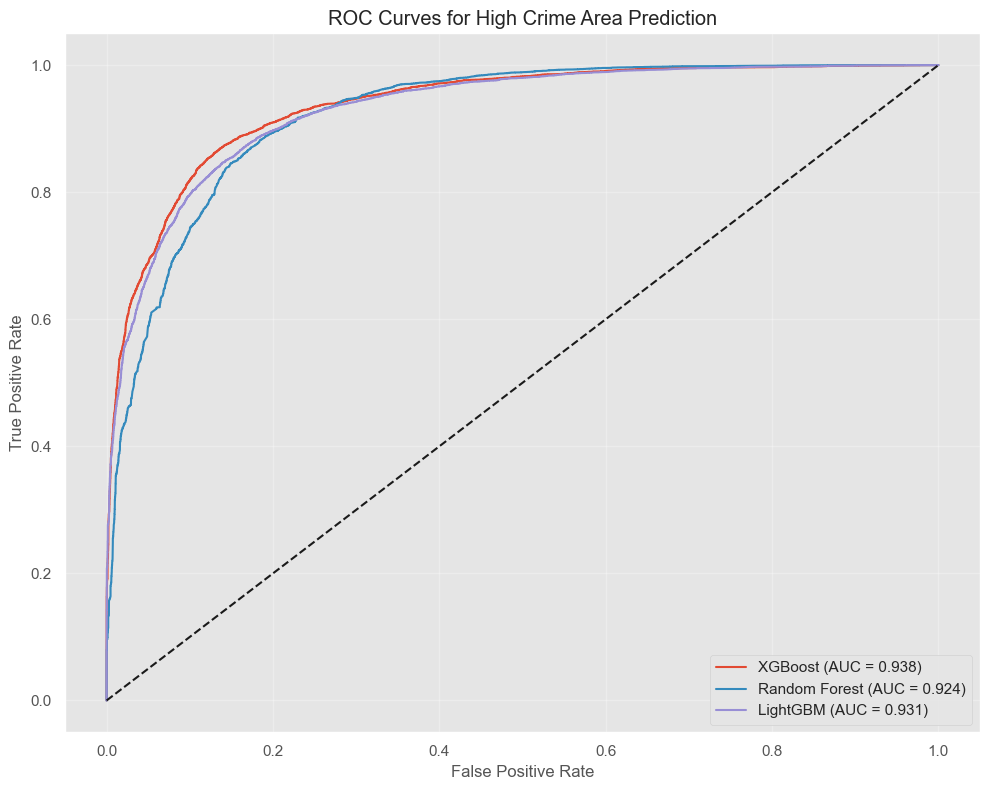

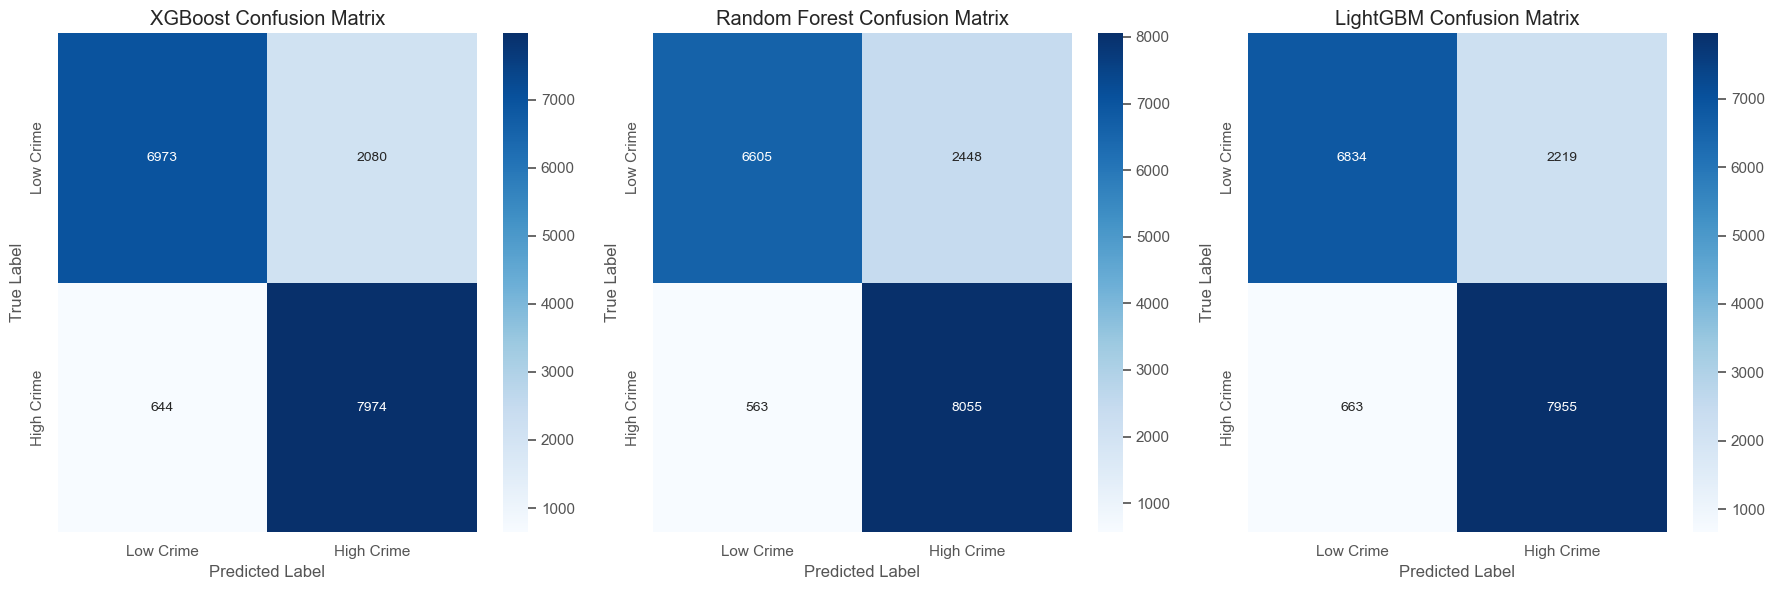


Model Performance Comparison:
           Model        MSE      RMSE       MAE        R²   ROC AUC  \
0        XGBoost  33.051125  5.749011  3.675228  0.845903  0.937564   
1  Random Forest  61.588803  7.847853  4.540288  0.712850  0.923603   
2       LightGBM  36.111533  6.009287  3.846854  0.831635  0.931498   

   Training Time (s)  
0           1.080794  
1           9.040091  
2           1.412302  


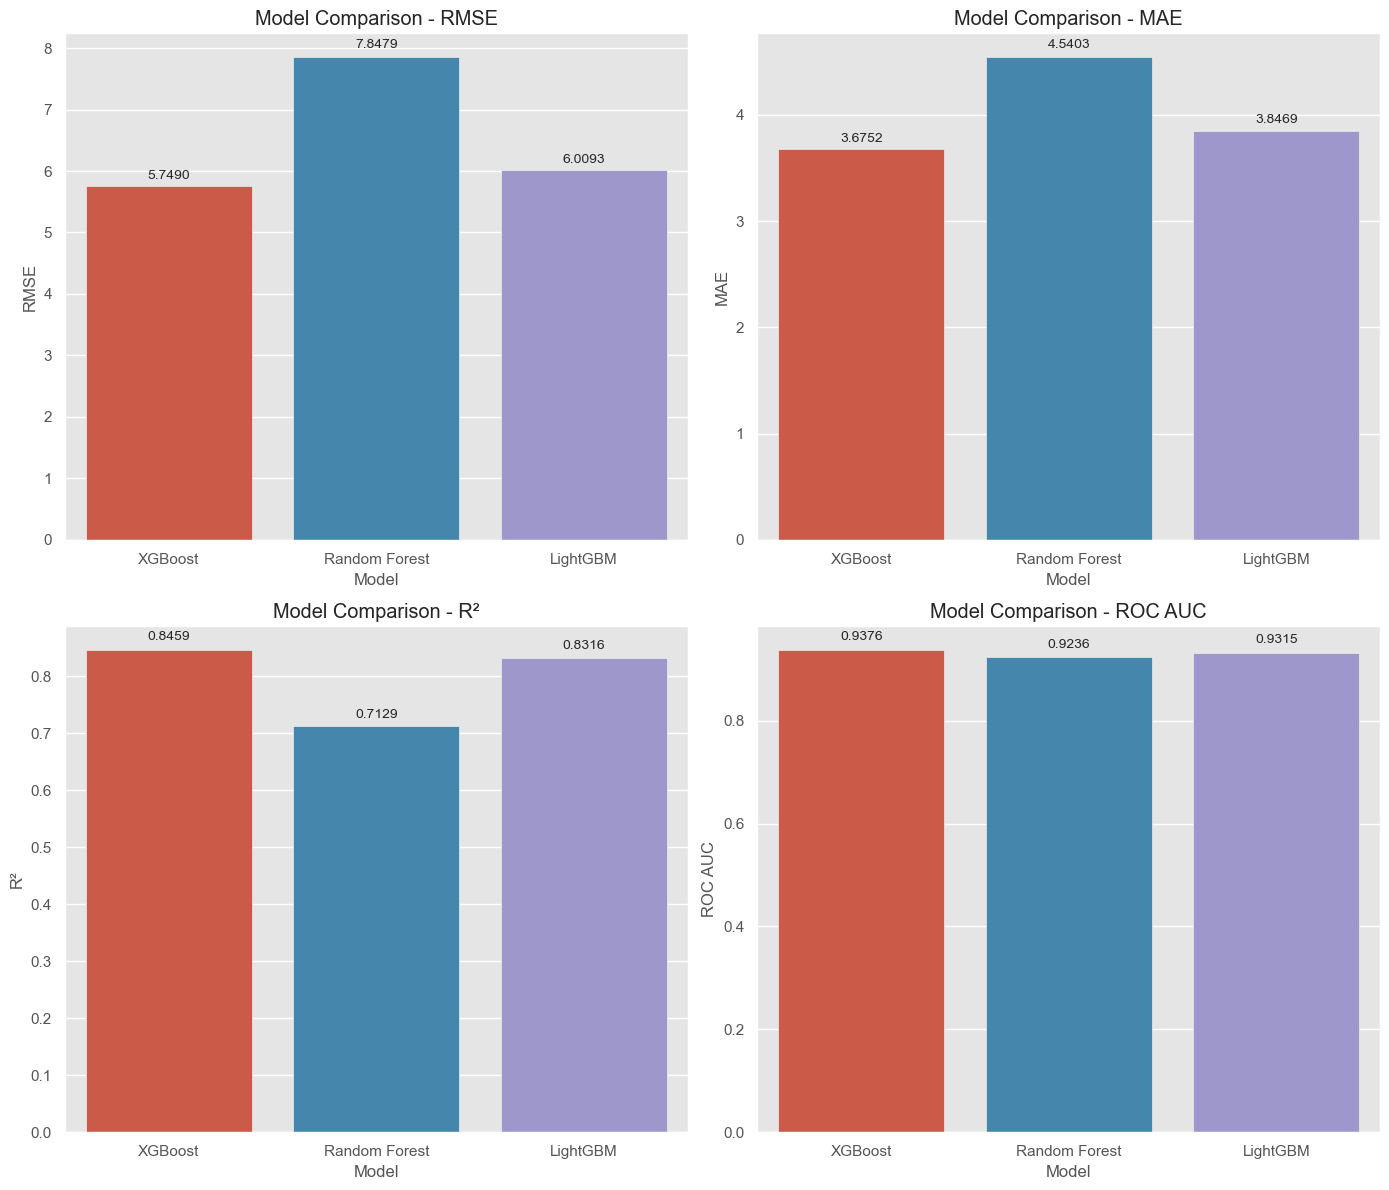

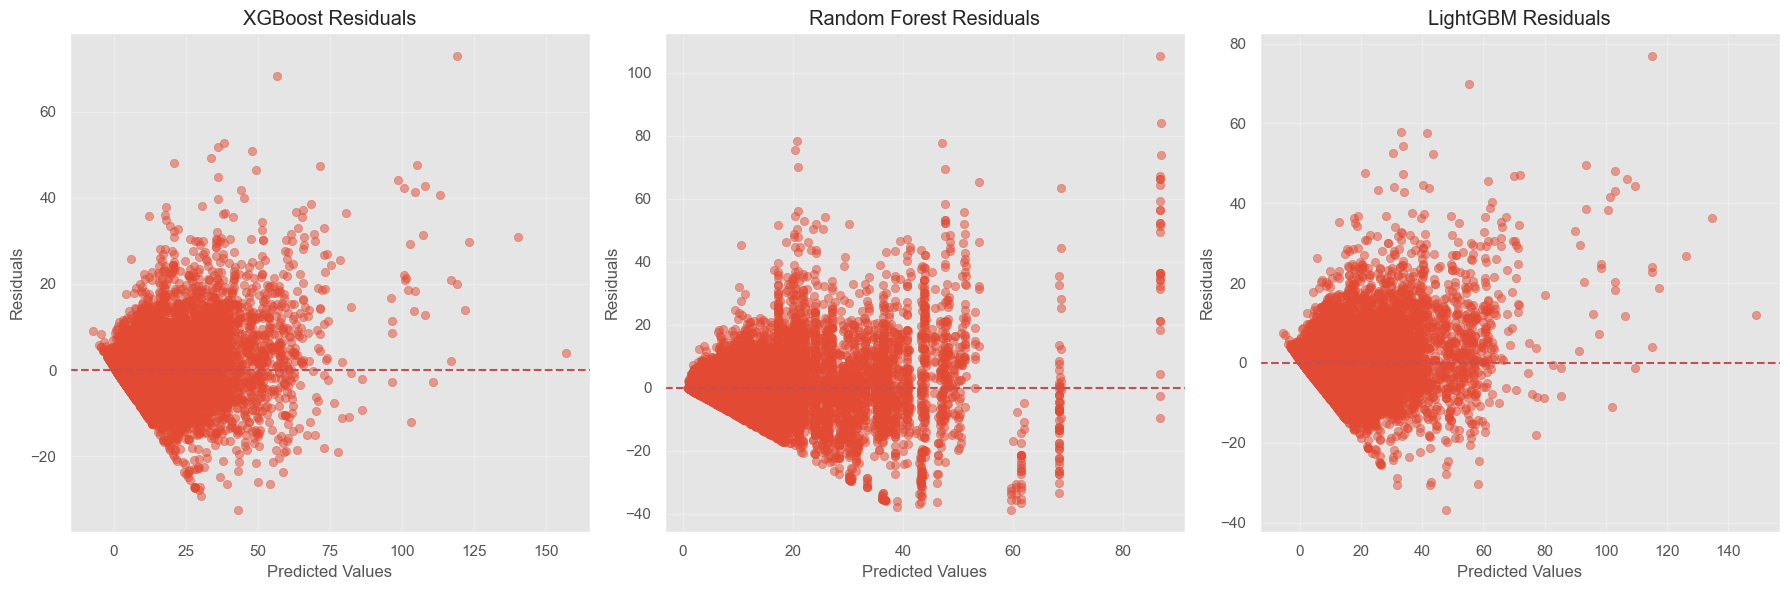


Best model based on R²: XGBoost


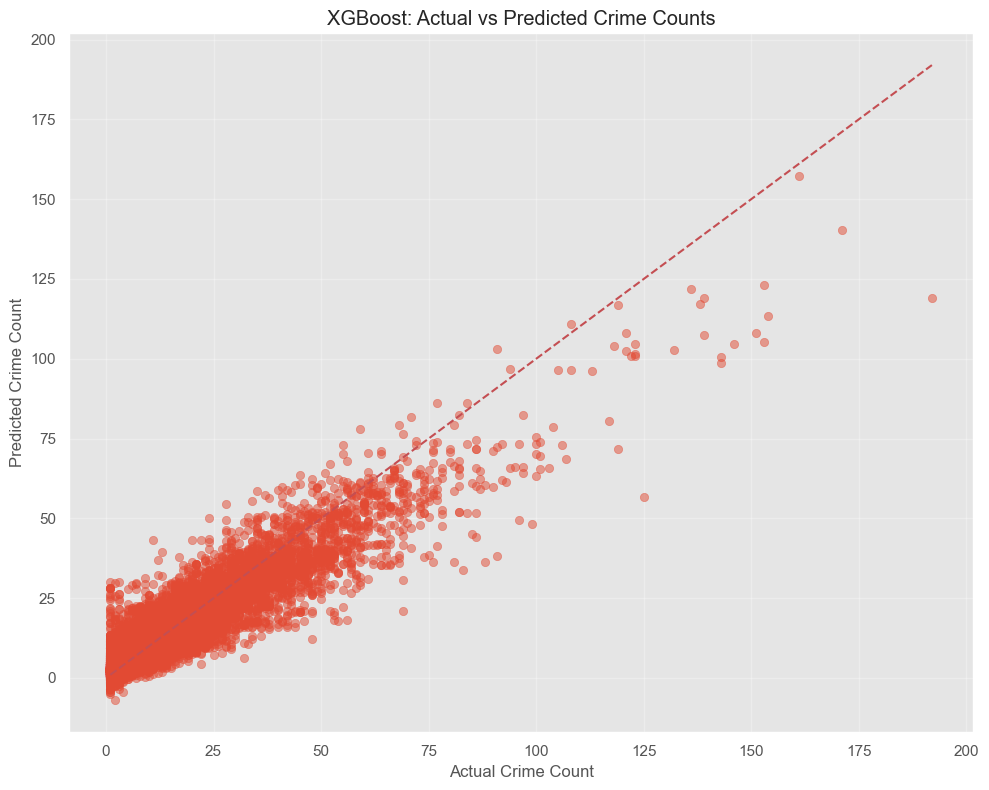


Generating crime hotspot map using XGBoost...


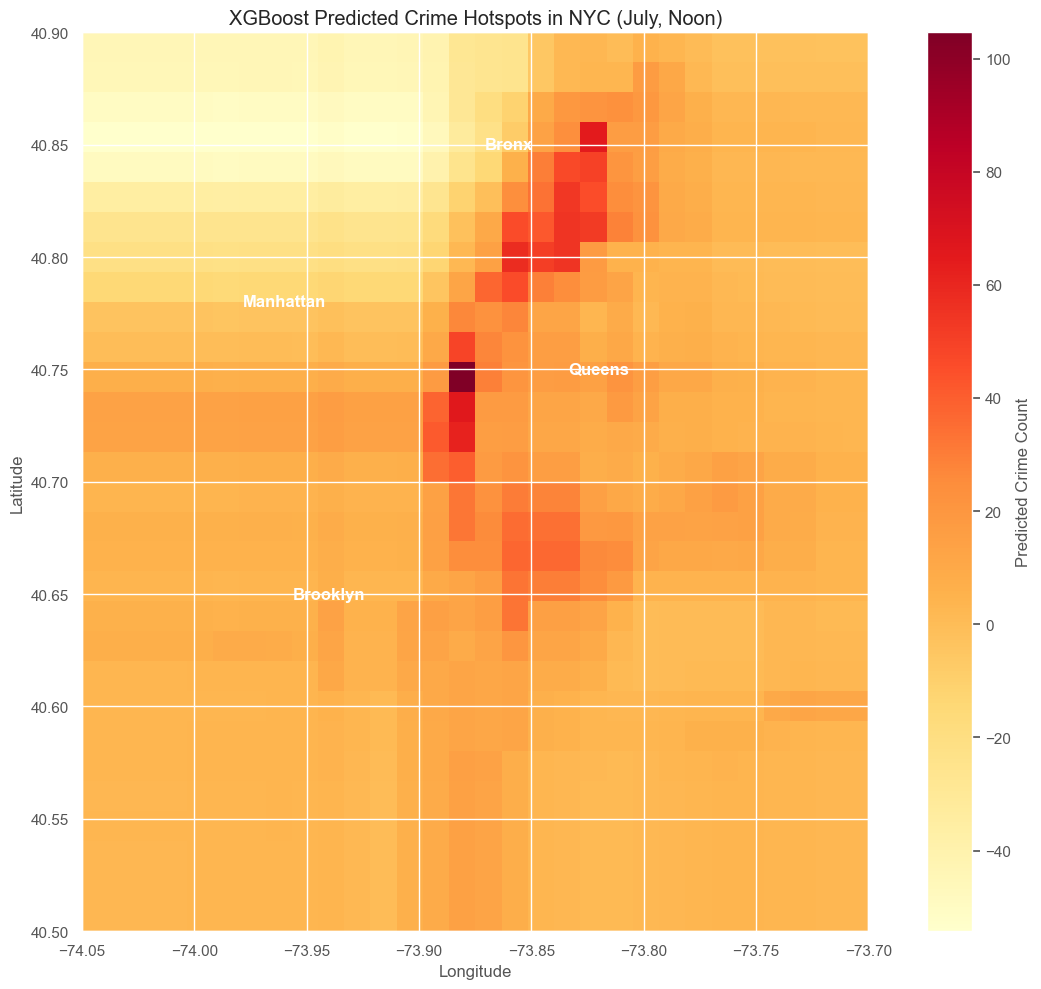

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load and preprocess data
print("Loading and preprocessing data...")
df = pd.read_csv('NYC Crime.csv')

# Convert date columns
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
df = df[(df['CMPLNT_FR_DT'] >= '2013-01-01') & (df['CMPLNT_FR_DT'] <= '2015-12-31')]
df = df.dropna(subset=['Latitude', 'Longitude', 'CMPLNT_FR_DT'])

# Extract temporal features
df['year'] = df['CMPLNT_FR_DT'].dt.year
df['month'] = df['CMPLNT_FR_DT'].dt.month
df['dayofweek'] = df['CMPLNT_FR_DT'].dt.dayofweek
if 'CMPLNT_FR_TM' in df.columns:
    df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')
    df['hour'] = df['CMPLNT_FR_TM'].dt.hour
    time_feature = 'hour'
else:
    time_feature = 'dayofweek'

# Create spatial grid
lat_bins, lon_bins = 30, 30
lat_min, lat_max = 40.5, 40.9
lon_min, lon_max = -74.05, -73.7

df['lat_bin'] = pd.cut(df['Latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['Longitude'], bins=lon_bins, labels=False)
df['grid_id'] = df['lat_bin'] * 1000 + df['lon_bin']

# Create time identifier
if time_feature == 'hour':
    df['time_id'] = df['month'] * 100 + df['hour']
else:
    df['time_id'] = df['month'] * 100 + df['dayofweek']

# Count crimes by grid cell and time
crime_counts = df.groupby(['grid_id', 'time_id']).size().reset_index(name='crime_count')

# Create feature matrix
grid_data = crime_counts.copy()
grid_data['lat_bin'] = grid_data['grid_id'] // 1000
grid_data['lon_bin'] = grid_data['grid_id'] % 1000

if time_feature == 'hour':
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['hour'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'hour']
else:
    grid_data['month'] = grid_data['time_id'] // 100
    grid_data['dayofweek'] = grid_data['time_id'] % 100
    feature_columns = ['lat_bin', 'lon_bin', 'month', 'dayofweek']

# Extract features and target
X = grid_data[feature_columns]
y = grid_data['crime_count']

print(f"Processed data shape: {X.shape}")

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For ROC analysis and confusion matrices (since we're doing regression)
# We need to convert to a binary classification problem
# Let's define "high crime" areas as those with crime counts above the median
y_median = np.median(y)
y_binary = (y > y_median).astype(int)
y_train_binary = (y_train > y_median).astype(int)
y_test_binary = (y_test > y_median).astype(int)

print(f"Median crime count: {y_median}")
print(f"High crime areas: {sum(y_binary == 1)}, Low crime areas: {sum(y_binary == 0)}")

# Train and evaluate multiple models
models = {
    'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, objective='reg:squarederror', random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, objective='regression', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")
    start_time = time.time()

    # Train model
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    # Regression predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # For binary classification metrics (high crime vs low crime)
    y_pred_binary = (y_pred > y_median).astype(int)

    # Calculate ROC curve and AUC
    # For this we need probability estimates, but we have regression values
    # We can normalize the predictions as a proxy for probabilities
    y_pred_proba = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

    # Calculate ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_binary': y_pred_binary,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'train_time': train_time,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }

    print(f"Training time: {train_time:.2f} seconds")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'],
             label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for High Crime Area Prediction')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, result) in zip(axes, results.items()):
    cm = confusion_matrix(y_test_binary, result['y_pred_binary'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticklabels(['Low Crime', 'High Crime'])
    ax.set_yticklabels(['Low Crime', 'High Crime'])

plt.tight_layout()
plt.show()

# Compare model performance metrics
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MSE': [results[model]['mse'] for model in results],
    'RMSE': [results[model]['rmse'] for model in results],
    'MAE': [results[model]['mae'] for model in results],
    'R²': [results[model]['r2'] for model in results],
    'ROC AUC': [results[model]['roc_auc'] for model in results],
    'Training Time (s)': [results[model]['train_time'] for model in results]
})

print("\nModel Performance Comparison:")
print(comparison_df)

# Plot performance comparison
metrics_to_plot = ['RMSE', 'MAE', 'R²', 'ROC AUC']
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    sns.barplot(x='Model', y=metric, data=comparison_df, ax=ax)
    ax.set_title(f'Model Comparison - {metric}')

    # Add value labels
    for j, v in enumerate(comparison_df[metric]):
        ax.text(j, v * 1.02, f'{v:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Plot residuals for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, result) in zip(axes, results.items()):
    residuals = y_test - result['y_pred']
    ax.scatter(result['y_pred'], residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f'{name} Residuals')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Show actual vs predicted for best model
best_model = comparison_df.iloc[comparison_df['R²'].idxmax()]['Model']
print(f"\nBest model based on R²: {best_model}")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, results[best_model]['y_pred'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Crime Count')
plt.ylabel('Predicted Crime Count')
plt.title(f'{best_model}: Actual vs Predicted Crime Counts')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Generate crime hotspot prediction map using the best model
print(f"\nGenerating crime hotspot map using {best_model}...")

# Create prediction grid
month = 7  # July
if time_feature == 'hour':
    time_value = 12  # Noon
    time_desc = "Noon"
else:
    time_value = 6  # Saturday
    time_desc = "Saturday"

# Build prediction grid
grid_points = []
for i in range(lat_bins):
    for j in range(lon_bins):
        if time_feature == 'hour':
            grid_points.append([i, j, month, time_value])
        else:
            grid_points.append([i, j, month, time_value])

# Convert to DataFrame
pred_grid = pd.DataFrame(grid_points, columns=feature_columns)
pred_grid_scaled = scaler.transform(pred_grid)

# Make predictions with best model
best_pred = results[best_model]['model'].predict(pred_grid_scaled)

# Reshape for heatmap
heatmap_data = np.zeros((lat_bins, lon_bins))
for idx, (i, j, _, _) in enumerate(grid_points):
    heatmap_data[int(i), int(j)] = best_pred[idx]

# Plot heatmap
plt.figure(figsize=(12, 10))
plt.imshow(heatmap_data, cmap='YlOrRd', origin='lower',
          extent=[lon_min, lon_max, lat_min, lat_max])

plt.colorbar(label='Predicted Crime Count')
plt.title(f'{best_model} Predicted Crime Hotspots in NYC (July, {time_desc})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add borough labels
borough_positions = {
    'Manhattan': (-73.96, 40.78),
    'Brooklyn': (-73.94, 40.65),
    'Queens': (-73.82, 40.75),
    'Bronx': (-73.86, 40.85),
    'Staten Island': (-74.15, 40.58)
}

for borough, (lon, lat) in borough_positions.items():
    if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
        plt.text(lon, lat, borough, fontsize=12, ha='center', va='center',
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()